In [7]:
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [8]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [16]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.


True

In [9]:
# Step 1: Collect tweets (In this case, load from CSV)
def load_tweets(file_path, num_samples=10000):
    df = pd.read_csv(file_path, encoding='latin-1', header=None, 
                     names=['target', 'id', 'date', 'flag', 'user', 'text'])
    return df.sample(n=num_samples, random_state=42)


In [10]:

# Step 2: Pre-process tweets
def preprocess_tweet(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [11]:

# Step 3: Apply sentiment analysis
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

# Step 4: Apply named entity recognition
def extract_entities(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    tree = ne_chunk(pos_tags)
    entities = []
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            entities.append((subtree.label(), ' '.join([token for token, pos in subtree.leaves()])))
    return entities

# Step 5: Cluster tweets
def cluster_tweets(texts, n_clusters=5):
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(texts)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_

# Step 6: Visualize analysis
def visualize_analysis(df):
    # Sentiment distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df['sentiment'], bins=50, kde=True)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Score')
    plt.savefig('sentiment_distribution.png')
    plt.close()

    # Top entities
    entity_counts = df['entities'].explode().value_counts().head(10)
    plt.figure(figsize=(12, 6))
    entity_counts.plot(kind='bar')
    plt.title('Top 10 Named Entities')
    plt.xlabel('Entity')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_entities.png')
    plt.close()

    # Cluster visualization (using t-SNE for dimensionality reduction)
    from sklearn.manifold import TSNE
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['processed_text'])
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(X.toarray())

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Tweet Clusters Visualization')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.savefig('tweet_clusters.png')
    plt.close()


In [ ]:
# Step 1: Load tweets
df = load_tweets('data.csv', num_samples=1000)


In [ ]:
# Step 2: Pre-process tweets
df['processed_text'] = df['text'].apply(preprocess_tweet)


In [ ]:
# Step 3: Apply sentiment analysis
df['sentiment'] = df['processed_text'].apply(analyze_sentiment)


In [ ]:
# Step 4: Apply named entity recognition
df['entities'] = df['processed_text'].apply(extract_entities)

In [ ]:
# Step 5: Cluster tweets
df['cluster'] = cluster_tweets(df['processed_text'])

IndexError: index 0 is out of bounds for axis 0 with size 0

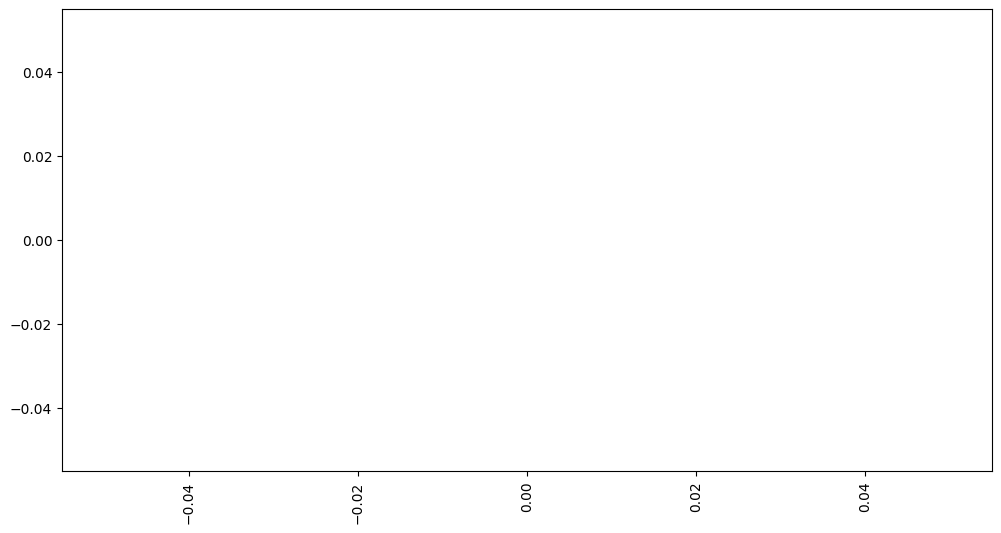

In [17]:
# Step 6: Visualize analysis
visualize_analysis(df)

print("Analysis complete. Visualization images saved.")